In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# LightGBM

- XGBoost와 부스팅 계열 알고리즘에서 가장 각광을 받고 있음

- XGBoost 보다 학습에 걸리는 시간이 훨씬 적음

https://lightgbm.readthedocs.io/en/latest/


### LightGBM의 장점
- XGBoost 대비 더 빠른 학습과 예측 수행 시간
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할
    - 원-핫인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행

### LightGBM의 단점
- 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움
- (공식 문서상 대략 10,000건 이하의 데이터 세트)

### 기존 GBM과의 차이점
- 일반적인 균형트리분할(Level Wise) 방식과 달리 **`리프중심 트리분할(Leaf Wise)`** 방식을 사용

- 균형트리분할은 최대한 균형 잡힌 트리를 유지하며 분할하여 트리의 깊이를 최소화하여 오버피팅에 강한구조이지만 균형을 맞추기 위한 시간이 필요함
- 리프중심 트리분할의 경우 최대 손실 값을 가지는 리프노드를 지속적으로 분할하면서 트리가 깊어지고 비대칭적으로 생성
    - 이로써 예측 오류 손실을 최소화하고자 함
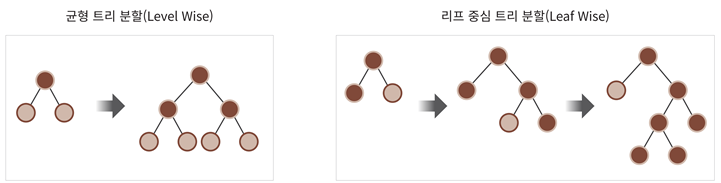

**사이킷런의 Estimator를 상속받아 fit(), predict() 기반의 학습과 예측, 사이킷런의 다양한 유틸리티 활용 가능**

### LightGBM 설치

- https://lightgbm.readthedocs.io/en/latest/Installation-Guide.html
- 아나콘다를 통해 설치
- 윈도우에 설치할 경우 Visual Studio tool 2015 이상이 먼저 설치되어 있어야 함
    - https://visualstudio.microsoft.com/ko/downloads/
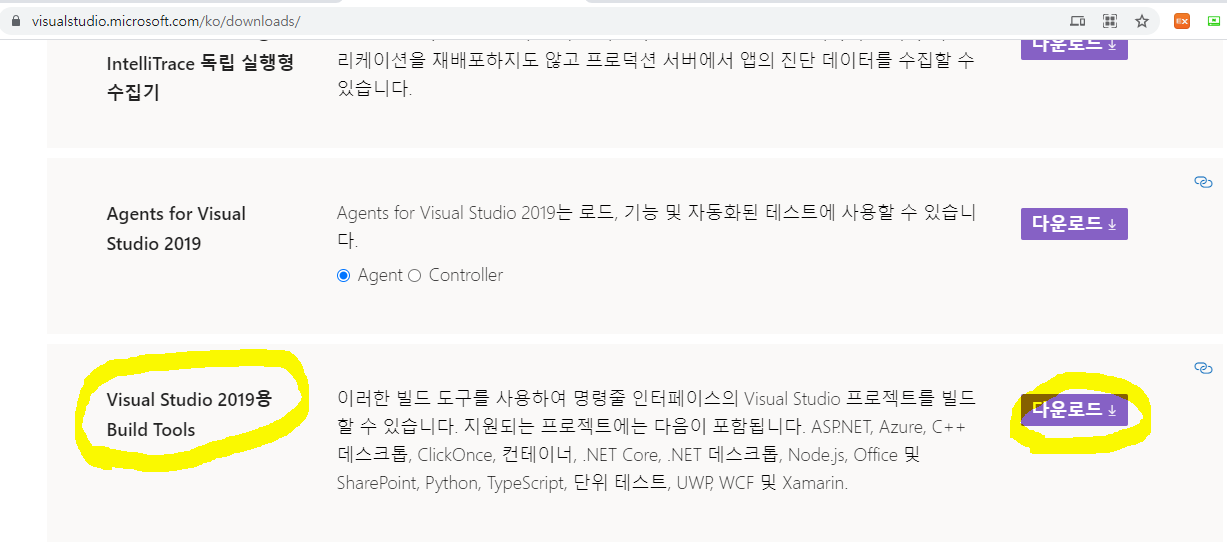

In [ ]:
# lightgbm 버전 확인


### LightGBM 하이퍼파라미터

- XGBoost와 매우 유사함
- 유의할 점 :
    - 리프 노드가 계속 분할하면서 트리의 깊이가 깊어지므로 이러한 트리 특성에 맞는 하이퍼 파라미터 설정이 필요

#### 하이퍼 파라미터 튜닝 방안

**[방안1]**
num_leaves 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것

- num_leaves는 개별 트리가 가질 수 있는 최대 리프 개수
    - num_leaves 개수를 높이면 정확도가 높아지나 트리의 깊이가 깊어지고 모델의 복잡도가 커져 과적합 영향도가 커짐
        
        
- min_child_samples : 
    - 과적합을 개선하기 위한 중요한 파라미터
    - num_leaves와 학습 데이터의 크기에 따라 달라지지만 보통 큰 값으로 설정하면 트리가 깊어짐을 방지함
        
        
- max_depth : 깊이의 크기를 제한
    - num_leaves, min_data_in_leaf와 결합해 과적합을 개선하는데 사용
    
    
**[방안2]**
learning_rate를 작게 하면서 n_estimations를 크게 하는 것
- n_estimators를 너무 크게 하는 것은 과적합으로 오히려 성능이 저하될 수 있으므로 주의



**[방안3]**
과적합을 제어하기 위해서 reg_lambda, reg_alpha와 같은 regularization을 적용


**[방안4]**
학습 데이터에 사용할 피처 수나 데이터 샘플링 레코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터를 적용하는 것도 과적합 제어 방안

        
        


### 실습. LightGBM 적용한 위스콘신 유방암 예측

#### 데이터 로드 및 학습/테스트 데이터 분할

#### LightGBM으로 학습

#### LightGBM 기반 예측 성능 평가

#### plot_importance( )를 이용하여 feature 중요도 시각화

-----